<a href="https://colab.research.google.com/github/Gokkulnath/EIP2/blob/master/Session_5_EIP_Assignement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# https://github.com/qubvel/classification_models

!pip install -q image-classifiers

#!wget https://github.com/qubvel/classification_models/releases/download/0.0.1/resnet18_imagenet_1000.h5

     |████████████████████████████████| 81kB 6.4MB/s 


In [0]:
# http://www.hackevolve.com/where-cnn-is-looking-grad-cam/

In [0]:
import keras
from keras.datasets import cifar10
import numpy as np

from keras.preprocessing.image import  ImageDataGenerator
from classification_models.resnet import ResNet18, preprocess_input

# Training parameters
batch_size = 32  # orig paper trained all networks with batch_size=128
epochs = 10
data_augmentation = True
num_classes = 10

# Subtracting pixel mean improves accuracy
subtract_pixel_mean = True
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Input image dimensions.
input_shape = x_train.shape[1:]

# Normalize data.
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# If subtract pixel mean is enabled
if subtract_pixel_mean:
    x_train_mean = np.mean(x_train, axis=0)
    x_train -= x_train_mean
    x_test -= x_train_mean

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print('y_train shape:', y_train.shape)

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


datagen = ImageDataGenerator(
    # set input mean to 0 over the dataset
    featurewise_center=False,
    # set each sample mean to 0
    samplewise_center=False,
    # divide inputs by std of dataset
    featurewise_std_normalization=False,
    # divide each input by its std
    samplewise_std_normalization=False,
    # apply ZCA whitening
    zca_whitening=False,
    # epsilon for ZCA whitening
    zca_epsilon=1e-06,
    # randomly rotate images in the range (deg 0 to 180)
    rotation_range=0,
    # randomly shift images horizontally
    width_shift_range=0.1,
    # randomly shift images vertically
    height_shift_range=0.1,
    # set range for random shear
    shear_range=0.,
    # set range for random zoom
    zoom_range=0.,
    # set range for random channel shifts
    channel_shift_range=0.,
    # set mode for filling points outside the input boundaries
    fill_mode='nearest',
    # value used for fill_mode = "constant"
    cval=0.,
    # randomly flip images
    horizontal_flip=True,
    # randomly flip images
    vertical_flip=False,
    # set rescaling factor (applied before any other transformation)
    rescale=None,
    # set function that will be applied on each input
    preprocessing_function=None,
    # image data format, either "channels_first" or "channels_last"
    data_format=None,
    # fraction of images reserved for validation (strictly between 0 and 1)
    validation_split=0.0)

# Compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied).
datagen.fit(x_train)


n_classes = 10

# build model
base_model = ResNet18(input_shape=(32,32,3), weights='imagenet', include_top=False)


x = keras.layers.GlobalAveragePooling2D()(base_model.output)
output = keras.layers.Dense(n_classes, activation='softmax')(x)
model = keras.models.Model(inputs=[base_model.input], outputs=[output])

# Freeze base_model
# for layer in base_model.layers:
#   layer.trainable=False


# train
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model on the batches generated by datagen.flow().
model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),
        validation_data=(x_test, y_test),steps_per_epoch=len(x_train) // batch_size,
        epochs=epochs, verbose=1, workers=4)

    


Using TensorFlow backend.


170500096/170498071 [==============================] - 6s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
y_train shape: (50000, 1)


W0710 16:49:28.776510 140140611524480 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0710 16:49:28.835162 140140611524480 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:245: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0710 16:49:28.836709 140140611524480 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0710 16:49:28.843389 140140611524480 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W0710 16:49:28.844935 140140

44924928/44920640 [==============================] - 2s 0us/step


W0710 16:49:37.622016 140140611524480 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0710 16:49:37.801181 140140611524480 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/10
1562/1562 [==============================] - 118s 76ms/step - loss: 1.0842 - acc: 0.6274 - val_loss: 0.7619 - val_acc: 0.7368
Epoch 2/10
1562/1562 [==============================] - 113s 72ms/step - loss: 0.7700 - acc: 0.7326 - val_loss: 0.6373 - val_acc: 0.7802
Epoch 3/10
1562/1562 [==============================] - 112s 72ms/step - loss: 0.6702 - acc: 0.7657 - val_loss: 0.6200 - val_acc: 0.7826
Epoch 4/10
1562/1562 [==============================] - 113s 72ms/step - loss: 0.6093 - acc: 0.7866 - val_loss: 0.5427 - val_acc: 0.8136
Epoch 5/10
1562/1562 [==============================] - 113s 72ms/step - loss: 0.5645 - acc: 0.8039 - val_loss: 0.5263 - val_acc: 0.8180
Epoch 6/10
1562/1562 [==============================] - 113s 72ms/step - loss: 0.5294 - acc: 0.8174 - val_loss: 0.5202 - val_acc: 0.8201
Epoch 7/10
1562/1562 [==============================] - 112s 72ms/step - loss: 0.4970 - acc: 0.8252 - val_loss: 0.5163 - val_acc: 0.8224
Epoch 8/10
1562/1562 [===================

In [0]:
# from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from keras.preprocessing import image
import keras.backend as K
import numpy as np
import cv2
import sys

In [0]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
data (InputLayer)               (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
bn_data (BatchNormalization)    (None, 32, 32, 3)    9           data[0][0]                       
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, 38, 38, 3)    0           bn_data[0][0]                    
__________________________________________________________________________________________________
conv0 (Conv2D)                  (None, 16, 16, 64)   9408        zero_padding2d_1[0][0]           
__________________________________________________________________________________________________
bn0 (Batch

In [0]:

preds = model.predict(x_test)
class_idx = np.argmax(preds[0])

test_preds = np.argmax(preds,axis=1)
test_actual=np.argmax(y_test,axis=1)
class_output = model.output[:, class_idx]


In [0]:
test_actuala.shape

(10000,)

In [0]:
misclassified = test_actual!=test_preds
misclassified

array([False, False, False, ..., False, False, False])

In [0]:
last_conv_layer = model.get_layer("stage4_unit2_conv1")

In [0]:
import keras.backend as K
grads = K.gradients(class_output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0, 1, 2))
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([x])
for i in range(512):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
    
    
heatmap = np.mean(conv_layer_output_value, axis=-1)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)




InvalidArgumentError: ignored

In [0]:
img = cv2.imread(img_path)
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)
cv2.imshow("Original", img)
cv2.imshow("GradCam", superimposed_img)
cv2.waitKey(0)

In [0]:
!wget https://data.whicdn.com/images/14922648/large.jpg -O sample.jpg

--2019-07-10 17:45:37--  https://data.whicdn.com/images/14922648/large.jpg
Resolving data.whicdn.com (data.whicdn.com)... 205.185.216.10, 205.185.216.42
Connecting to data.whicdn.com (data.whicdn.com)|205.185.216.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 37959 (37K) [image/jpeg]
Saving to: ‘sample.jpg’

sample.jpg          100%[===================>]  37.07K  --.-KB/s    in 0.06s   

2019-07-10 17:45:37 (617 KB/s) - ‘sample.jpg’ saved [37959/37959]



In [0]:
# Code As is 
!ls

 sample_data
 sample.jpg
'uploads%2Fcard%2Fimage%2F622815%2F79f22d81-b648-4b67-8b9a-38a8aedefadc.jpg%2F950x534__filters:quality(80).jpg?signature=2bLfdbBMsyVBx0fQENhp2EcN7Ss='
'uploads%2Fcard%2Fimage%2F622815%2F79f22d81-b648-4b67-8b9a-38a8aedefadc.jpg%2F950x534__filters:quality(80).jpg?signature=2bLfdbBMsyVBx0fQENhp2EcN7Ss=.1'
'uploads%2Fstory%2Fthumbnail%2F59889%2F0cd940dc-fd2f-47c4-9f33-7d46a70c02e7.jpg%2F950x534.jpg?signature=gsLuAo-YP6XMBlhtj2H2Rvpt0Cc='


In [0]:
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from keras.preprocessing import image
import keras.backend as K
import numpy as np
import cv2
import sys

model = VGG16(weights="imagenet")
img_path = 'sample.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [0]:
preds = model.predict(x)
class_idx = np.argmax(preds[0])
class_output = model.output[:, class_idx]
last_conv_layer = model.get_layer("block5_conv3")


In [0]:
grads = K.gradients(class_output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0, 1, 2))
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])

pooled_grads_value, conv_layer_output_value = iterate([x])

for i in range(512):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

In [0]:
heatmap = np.mean(conv_layer_output_value, axis=-1)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
heatmap.shape

(14, 14)

In [0]:
def plot(img_np,heatmap_np,num_imgs=1):
#   plt.figure(figsize=(20, 4))
  for i in range(num_imgs):
    print(img_np.shape)
    print(heatmap_np.shape)
    heatmap = cv2.resize(heatmap_np[i], (img_np[i].shape[0], img_np[i].shape[1]))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    print(heatmap_np.shape)

    
    superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)
    plt.subplot(i, 2, 1)
    plt.imshow(img)
    plt.subplot(i, 2, 2)
    plt.imshow(superimposed_img)

In [0]:
plot(img,heatmap,num_imgs=1)

(375, 500, 3)
(375, 500, 3)
(375, 500, 3)


error: ignored

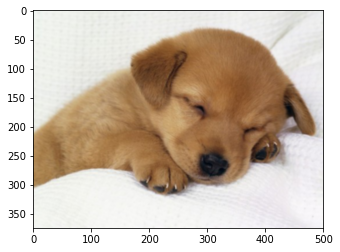

In [0]:
import matplotlib.pyplot as plt
from PIL import Image

img = Image.open(img_path)
img=np.array(img)
# img.thumbnail((32, 32), Image.ANTIALIAS) #
plt.imshow(img,interpolation="bicubic")
# cv2.waitKey(0)

In [0]:
img.shape[1]

500

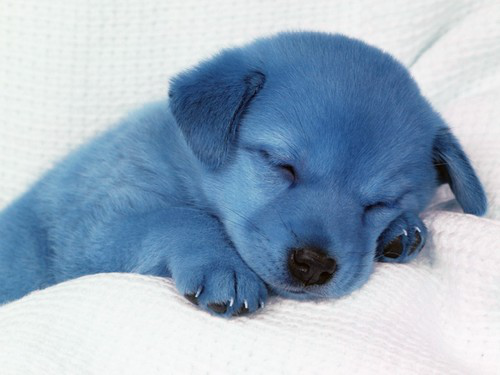

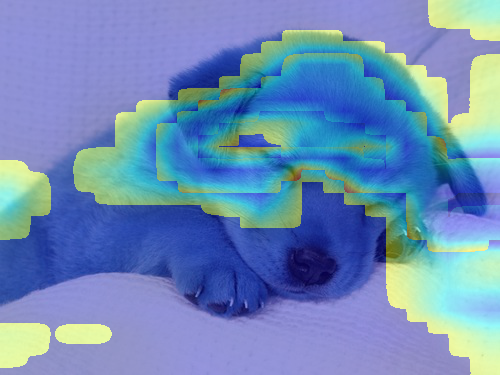

In [0]:
imh
cv2_imshow(superimposed_img)

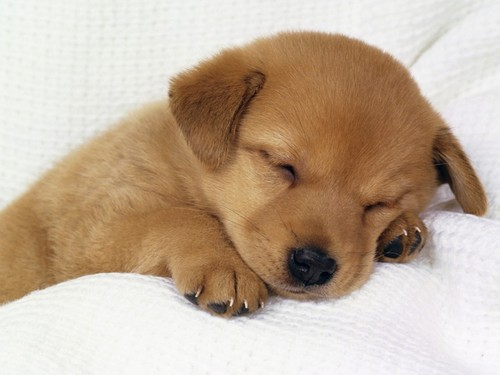

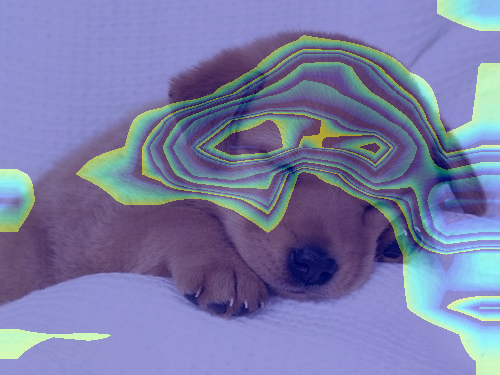

In [0]:
from google.colab.patches import cv2_imshow
img = cv2.imread(img_path)
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)
cv2_imshow(img)
cv2_imshow(superimposed_img)
# cv2.waitKey(0)

In [0]:
import keras 
from keras.layers import Conv2D,BatchNormalization,Input,SeparableConv2D,DepthwiseConv2D
from keras.models import  Sequential,Model



In [0]:
inp=Input((64,64,512))
x=Conv2D(1024,(3,3),use_bias=True)(inp)

In [0]:
4719616/791040

5.966343042071197

In [0]:
inp=Input((64,64,512))
x1=DepthwiseConv2D(64,(3,1),depth_multiplier=1,use_bias=False)(inp)

x2=DepthwiseConv2D(512,(1,3),depth_multiplier=2,use_bias=False)(x1)

# x2=DepthwiseConv2D(1024,(1,3),use_bias=False)(x1)
model1=Model(inp,x1)
model1.summary()


ValueError: ignored

In [0]:
model=Model(inp,x)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_28 (InputLayer)        (None, 64, 64, 512)       0         
_________________________________________________________________
conv2d_134 (Conv2D)          (None, 62, 62, 1024)      4718592   
Total params: 4,718,592
Trainable params: 4,718,592
Non-trainable params: 0
_________________________________________________________________


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 54, 54, 1024)      590848    
Total params: 590,848
Trainable params: 590,848
Non-trainable params: 0
_________________________________________________________________


In [0]:
x1=Conv2D(512,(3,1))(inp)   
x2=Conv2D(1024,(1,3))(x1)   

model1= Model(inp,x2)

In [0]:
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 64, 64, 512)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 62, 64, 512)       786944    
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 62, 62, 1024)      1573888   
Total params: 2,360,832
Trainable params: 2,360,832
Non-trainable params: 0
_________________________________________________________________


In [0]:
4719616/2360832

1.9991325092170895

In [0]:
inp=Input((224,224,3))
xb1=Conv2D(64,(3,3),strides=(1,1),padding='same')(inp)
xb2=Conv2D(64,(3,3),strides=(1,1),padding='same')(xb1)

pool1=keras.layers.MaxPool2D()(xb2)

xy1=Conv2D(128,(3,3),strides=(2,2),padding='valid')(pool1)
xy2=Conv2D(128,(3,3),strides=(2,2),padding='valid')(xy1)

pool2=keras.layers.MaxPool2D()(xy2)


xp1=Conv2D(256,(3,3),strides=(1,1),padding='same')(pool2)
xp2=Conv2D(256,(3,3),strides=(1,1),padding='same')(xp1)
xp3=Conv2D(256,(3,3),strides=(1,1),padding='same')(xp2)

pool3=keras.layers.MaxPool2D()(xp3)


xg1=Conv2D(256,(3,3),strides=(2,2),padding='valid')(pool3)
xg2=Conv2D(256,(3,3),strides=(2,2),padding='valid')(xg1)
xg3=Conv2D(256,(3,3),strides=(2,2),padding='valid')(xg2)

pool4=keras.layers.MaxPool2D()(xg3)



xr1=Conv2D(256,(3,3),strides=(1,1),padding='same')(pool4)
xr2=Conv2D(256,(3,3),strides=(1,1),padding='same')(xr1)
xr3=Conv2D(256,(3,3),strides=(1,1),padding='same')(xr2)

pool5=keras.layers.MaxPool2D()(xr3)






# x=Conv2D(128,(3,3),strides=(2,2),padding='valid')(x)
# x=Conv2D(128,(3,3),strides=(2,2),padding='valid')(x)
# x=Conv2D(128,(3,3),strides=(2,2),padding='valid')(x)
# x=Conv2D(128,(3,3),strides=(2,2),padding='valid')(x)
# x=Conv2D(128,(3,3),strides=(2,2),padding='valid')(x)
# x=Conv2D(128,(3,3),strides=(2,2),padding='valid')(x)

model=Model(inp,pool5)
model.summary()

ValueError: ignored